This code was written as part of the econometrics course in the section on panel data analysis. For panel data analysis, we take data from the RLMS - the RLMS Longitudinal Household Survey of the Higher School of Economics, which is a series of annual nationwide representative surveys based on a probability stratified multistage territorial sample of individuals from 1994 to 2019. 


Install the packages we need: for data manipulation, for graphs and for working with panel data, for regression tables


In [1]:
install.packages("tidyverse")
library("tidyverse") 
install.packages("plm")
library("plm")
install.packages("haven")
library(haven)
install.packages("hablar")
library(hablar)
install.packages("jtools")
library("jtools")
install.packages("huxtable")
library("huxtable")


also installing the dependencies ‘broom’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘ggplot2’, ‘haven’, ‘lubridate’, ‘modelr’, ‘readr’, ‘rvest’, ‘tidyr’

Warning message in install.packages("tidyverse"):
“installation of package ‘lubridate’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘sandwich’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’

Updating HTML ind

Import the data that we originally downloaded in dta format, cleaned up the "No answer" "Don't know" answer options and left only the variables that interest us

In [35]:
RLMS_USERS_CLEANED <- read_dta("/Users/kirasilvestrovich/Dropbox/Мой Mac (MacBook Air — Кира)/Desktop/ВШЭ/4 курс/Поступление финальные документы/Predoc code examples/RLMS_CLEAN.dta")

Our research question: how does an individual's salary affect his or her life and job satisfaction? And our hypotheses: a) the higher the salary, the higher the job satisfaction b) the higher the salary, the higher the satisfaction with life in general. Our salary is given in rubles, and satisfaction is measured from 1 to 5, where 1 is satisfied and 5 is completely dissatisfied.  

In [37]:
head(RLMS_USERS_CLEANED, n=10)

idind,year,J1_1_1,J10,M151,M132
1,1994,NA,160000,NA,NA
2,1994,NA,600000,NA,NA
3,1994,NA,1200000,NA,NA
4,1994,NA,39000,NA,NA
5,1994,NA,NA,NA,NA
6,1994,NA,NA,NA,NA
7,1994,NA,49000,NA,NA
8,1994,NA,156000,NA,NA
9,1994,NA,250000,NA,NA
10,1994,NA,400000,NA,NA


Names of variables:
J1_1 "Please tell how satisfied or dissatisfied you are with your work"
J10 "How much money have you received in the last 30 days from your main job"
M132 "How satisfied are you with your life in general at the moment?"

In [43]:
RLMS_USERS_CLEANED$year <- as.integer(RLMS_USERS_CLEANED$year)
RLMS_USERS_CLEANED$idind <- as.integer(RLMS_USERS_CLEANED$idind)
RLMS_USERS_CLEANED$J1_1_1 <- as.integer(RLMS_USERS_CLEANED$J1_1_1)
RLMS_USERS_CLEANED$M132 <- as.integer(RLMS_USERS_CLEANED$M151)
RLMS_USERS_CLEANED$J10 <- as.numeric(RLMS_USERS_CLEANED$J10)

In [44]:
str(RLMS_USERS_CLEANED)

tibble [364,386 × 7] (S3: tbl_df/tbl/data.frame)
 $ idind  : int [1:364386] 1 2 3 4 5 6 7 8 9 10 ...
 $ year   : int [1:364386] 1994 1994 1994 1994 1994 1994 1994 1994 1994 1994 ...
 $ J1_1_1 : int [1:364386] NA NA NA NA NA NA NA NA NA NA ...
 $ J10    : num [1:364386] 160000 600000 1200000 39000 NA NA 49000 156000 250000 400000 ...
 $ M151   : dbl+lbl [1:364386] NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
   ..@ label       : chr "Как часто Вы питаетесь вне дома?"
   ..@ format.stata: chr "%70.0g"
   ..@ labels      : Named num [1:8] 1 2 3 4 5 ...
   .. ..- attr(*, "names")= chr [1:8] "Практически всегда питаетесь вне дома" "Все рабочие дни недели вне дома" "В среднем 2-3 раза в неделю вне дома" "В среднем меньше 2-х раз в неделю" ...
 $ M132   : int [1:364386] NA NA NA NA NA NA NA NA NA NA ...
 $ logwage: num [1:364386] 12 13.3 14 10.6 NA ...


Logarithm the wage variable to get a log-normal distribution


In [45]:
RLMS_USERS_CLEANED$logwage <- log(1+RLMS_USERS_CLEANED$J10)

Wage distribution before taking logs 


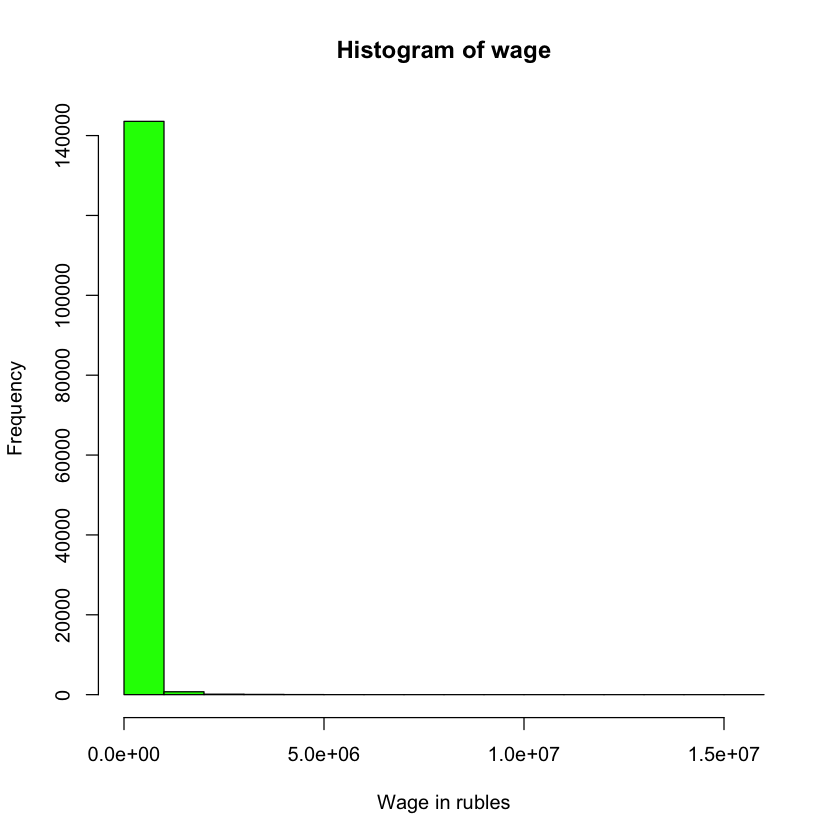

In [48]:
hist(RLMS_USERS_CLEANED$J10, 
          main="Histogram of wage", 
         xlab="Wage in rubles", 
          col="green")

Get log-normal distribution

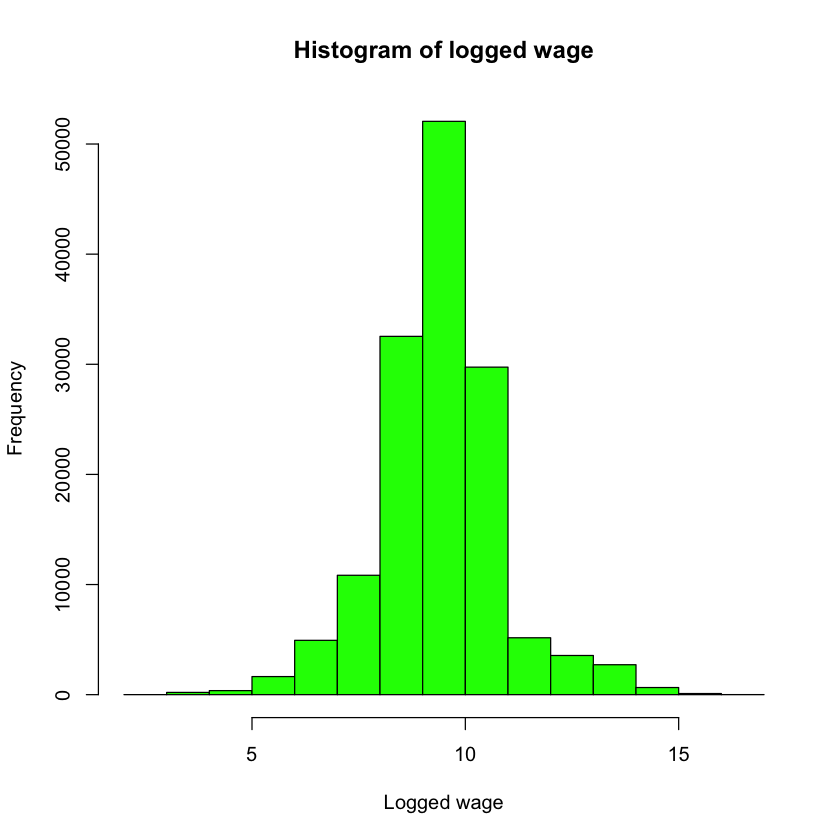

In [49]:
hist(RLMS_USERS_CLEANED$logwage, 
          main="Histogram of logged wage", 
         xlab="Logged wage", 
          col="green")

Declare our data to be a panel

In [50]:
panel <- pdata.frame(RLMS_USERS_CLEANED,
                 index = c("idind", "year"),
                 row.names = TRUE)

Data visualisation

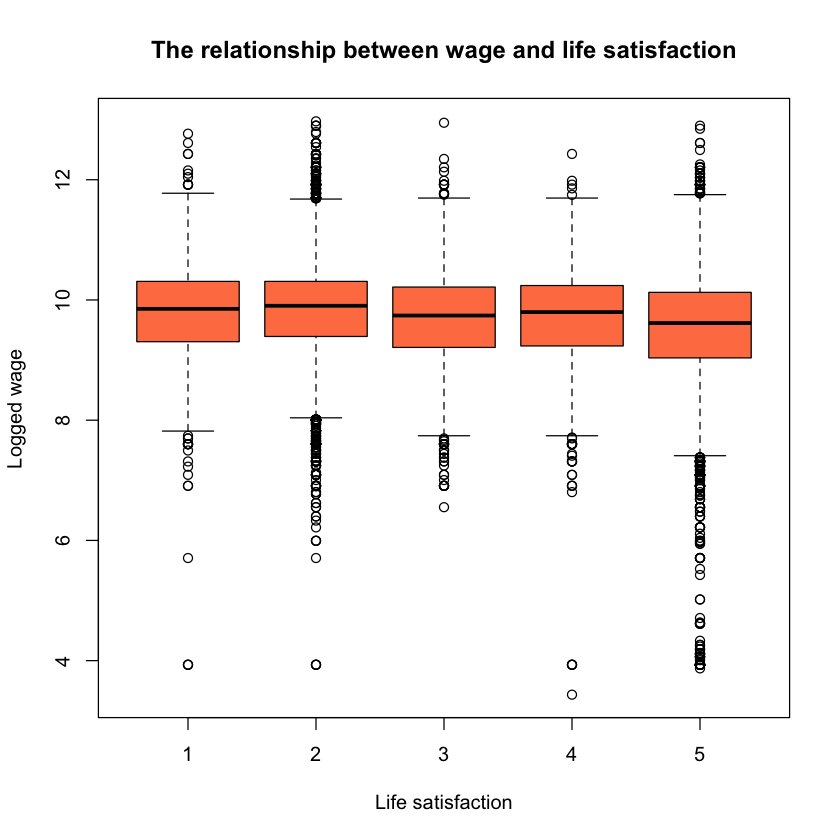

In [51]:
boxplot(logwage ~ M132,
        xlab = "Life satisfaction",
        ylab = "Logged wage",
        main = "The relationship between wage and life satisfaction",
        col = "coral", data = panel)

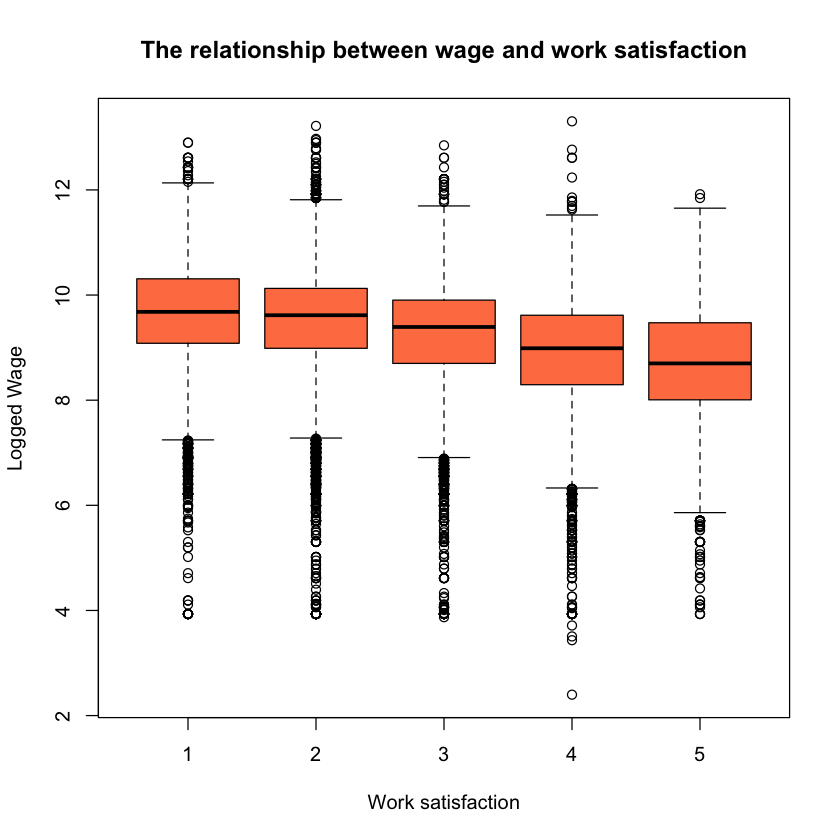

In [52]:
boxplot(logwage ~ J1_1_1,
        xlab = "Work satisfaction",
        ylab = "Logged Wage",
        main = "The relationship between wage and work satisfaction",
        col = "coral", data = panel)

We see that the higher the salary, the higher, on average, satisfaction with life in general and work (1 - completely satisfied, 5 - completely dissatisfied)

We estimate the pooled model for both hypotheses

In [53]:
m.pool1 <- plm(J1_1_1~ logwage, data = panel, model = "pooling")
m.pool2 <- plm(M132~ logwage, data = panel, model = "pooling")

In [54]:
summary(m.pool1)
summary(m.pool2)



Pooling Model

Call:
plm(formula = J1_1_1 ~ logwage, data = panel, model = "pooling")

Unbalanced Panel: n = 25803, T = 1-18, N = 124368

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-2.84164 -0.53955 -0.22547  0.62327  3.24197 

Coefficients:
              Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  4.8674171  0.0259659  187.45 < 2.2e-16 ***
logwage     -0.2608896  0.0027555  -94.68 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    120620
Residual Sum of Squares: 112510
R-Squared:      0.067234
Adj. R-Squared: 0.067227
F-statistic: 8964.33 on 1 and 124366 DF, p-value: < 2.22e-16

Pooling Model

Call:
plm(formula = M132 ~ logwage, data = panel, model = "pooling")

Unbalanced Panel: n = 19593, T = 1-9, N = 74442

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-4.22833 -1.20557 -0.85331  1.59177  2.86368 

Coefficients:
              Estimate Std. Error t-value  Pr(>|t|)    
(Intercept)  6.5840520  0.0664984  99.011 < 2.2e-16 ***
logwage     -0.3448066  0.0068277 -50.501 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    154890
Residual Sum of Squares: 149760
R-Squared:      0.033125
Adj. R-Squared: 0.033112
F-statistic: 2550.33 on 1 and 74440 DF, p-value: < 2.22e-16

We estimate Random Effects model for both hypotheses


In [55]:
m.random1 <- plm(J1_1_1~ logwage, data = panel, model = "random")
m.random2 <- plm(M132~ logwage, data = panel, model = "random")

In [56]:
summary(m.random1)
summary(m.random2)


Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = J1_1_1 ~ logwage, data = panel, model = "random")

Unbalanced Panel: n = 25803, T = 1-18, N = 124368

Effects:
                 var std.dev share
idiosyncratic 0.6495  0.8059 0.718
individual    0.2546  0.5046 0.282
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1524  0.3759  0.5083  0.4748  0.5813  0.6477 

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9705 -0.4935 -0.1444  0.0016  0.4930  3.2147 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  4.7140824  0.0289208 163.000 < 2.2e-16 ***
logwage     -0.2451798  0.0030569 -80.205 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    98535
Residual Sum of Squares: 81749
R-Squared:      0.1704
Adj. R-Squared: 0.17039
Chisq: 6432.83 on 1 DF, p-value: < 2.22e-16

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = M132 ~ logwage, data = panel, model = "random")

Unbalanced Panel: n = 19593, T = 1-9, N = 74442

Effects:
                 var std.dev share
idiosyncratic 1.2306  1.1093 0.614
individual    0.7722  0.8788 0.386
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2161  0.4662  0.5419  0.4997  0.5924  0.6121 

Residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.6972 -0.8362 -0.4378  0.0062  1.0451  2.7208 

Coefficients:
              Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)  5.6783592  0.0742877  76.437 < 2.2e-16 ***
logwage     -0.2539683  0.0076291 -33.290 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    102000
Residual Sum of Squares: 91771
R-Squared:      0.10082
Adj. R-Squared: 0.10081
Chisq: 1108.2 on 1 DF, p-value: < 2.22e-16

Evaluating the Fixed Effects model for both hypotheses

In [57]:
m.fixed1 <- plm(J1_1_1~ logwage, data = panel, model = "within")
m.fixed2 <- plm(M132 ~ logwage, data = panel, model = "within")


In [58]:
summary(m.fixed1)
summary(m.fixed2)

Oneway (individual) effect Within Model

Call:
plm(formula = J1_1_1 ~ logwage, data = panel, model = "within")

Unbalanced Panel: n = 25803, T = 1-18, N = 124368

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-3.19305021 -0.42568518 -0.00056384  0.36911681  3.45310392 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
logwage -0.2272665  0.0038402 -59.181 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    66294
Residual Sum of Squares: 64019
R-Squared:      0.034315
Adj. R-Squared: -0.21849
F-statistic: 3502.45 on 1 and 98564 DF, p-value: < 2.22e-16

Oneway (individual) effect Within Model

Call:
plm(formula = M132 ~ logwage, data = panel, model = "within")

Unbalanced Panel: n = 19593, T = 1-9, N = 74442

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-3.79378 -0.42575  0.00000  0.39478  3.01969 

Coefficients:
         Estimate Std. Error t-value  Pr(>|t|)    
logwage -0.143680   0.010079 -14.255 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    67744
Residual Sum of Squares: 67494
R-Squared:      0.0036913
Adj. R-Squared: -0.35221
F-statistic: 203.21 on 1 and 54848 DF, p-value: < 2.22e-16

Now let's look at the results of all three of our models for the first hypothesis. We see that in all three models the coefficient before the wage variable is significant at the 1% level and ranges from -0.26 to -0.227

In [59]:
export_summs(m.pool1, m.fixed1, m.random1, scale = TRUE)

,names,Model 1,Model 2,Model 3
,,Model 1,Model 2,Model 3
1,(Intercept),4.86741710776818 ***,,4.71408240351421 ***
2,,(0.0259658683681288),,(0.0289207708589514)
3,logwage,-0.260889601903612 ***,-0.227266530702966 ***,-0.245179751642193 ***
4,,(0.00275548332980642),(0.00384015998023488),(0.00305691637638473)
1.1,nobs,124368,124368,124368
2.1,r.squared,0.0672340080103473,0.0343154190727689,0.170397085549464
3.1,adj.r.squared,0.0672265078415553,-0.218490465851396,0.170390414892577
4.1,statistic,8964.33265365823,3502.45311180263,6432.83014868692
5,p.value,0,0,0


And let's look at the results of all three of our models for the second hypothesis. We see that in all three models the coefficient before the wage variable is significant at the 1% level and ranges from -0.34 to -0.14


In [60]:
export_summs(m.pool2, m.fixed2, m.random2, scale = TRUE)

,names,Model 1,Model 2,Model 3
,,Model 1,Model 2,Model 3
1,(Intercept),6.58405200388869 ***,,5.67835923244287 ***
2,,(0.0664984258621363),,(0.0742877329835745)
3,logwage,-0.344806580718748 ***,-0.143680398951188 ***,-0.253968301903696 ***
4,,(0.0068277395651416),(0.0100791839814504),(0.00762906357727587)
1.1,nobs,74442,74442,74442
2.1,r.squared,0.0331253891605789,0.00369128381816914,0.100822672928661
3.1,adj.r.squared,0.0331124005172307,-0.352213702255172,0.100810593706106
4.1,statistic,2550.33480191674,203.209639312231,1108.19595874446
5,p.value,0,5.03253702837695e-46,5.46444290092086e-243


Now we want to compare the models and choose the best one for both hypotheses. Let's start with a simple F test and compare the fixed-effects model and pooled regression

In [61]:
pFtest(m.fixed1, m.pool1)
pFtest(m.fixed2, m.pool2)


	F test for individual effects

data:  J1_1_1 ~ logwage
F = 2.8937, df1 = 25802, df2 = 98564, p-value < 2.2e-16
alternative hypothesis: significant effects



	F test for individual effects

data:  M132 ~ logwage
F = 3.4122, df1 = 19592, df2 = 54848, p-value < 2.2e-16
alternative hypothesis: significant effects


We reject the null hypothesis of a correct pooled model in favor of a model with fixed effects in both cases

We use the Hausman test to compare models with fixed effects and with random effects 

In [62]:
phtest(m.fixed1, m.random1)
phtest(m.fixed2, m.random2)


	Hausman Test

data:  J1_1_1 ~ logwage
chisq = 59.4, df = 1, p-value = 1.287e-14
alternative hypothesis: one model is inconsistent



	Hausman Test

data:  M132 ~ logwage
chisq = 280.34, df = 1, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


We reject the null hypothesis of coefficient consistency in both models (fixed and random) in favor of the hypothesis that in the random model the coefficients are invalid in both cases

Let's use the Breusch-Pagan test to compare the poole regression model and the model with random effects 

In [63]:
plmtest(m.random1,  type = "bp")
plmtest(m.random2,  type = "bp")


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  J1_1_1 ~ logwage
chisq = 28922, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects



	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  M132 ~ logwage
chisq = 26286, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


We reject the null hypothesis that the pool regression is correct <=> that ci is identically equal to 0 in both cases


Based on these tests, we can conclude that the best model in our case is the model with fixed effects for both hypotheses

Consequently, according to its results we see that a) 1% increase in wages, on average, leads to a 0.14 increase in life satisfaction b) 1% increase in wages, on average, leads to a 0.227 increase in job satisfaction 
Both of our hypotheses turn out to be true (but of course this is only a correlation for the moment, further research into this question needs more explanatory variables to fight the endogeneity problem and go towards identifying the causal connection)



